In [17]:
# KHAN MOHD OWAIS RAZA
# 20BCD7138
# CSE4005 Lab-4
# Question-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def transformMarital(df, column, value):
    df[column] = np.where(df[column].str.contains(value), 0, 1)


In [28]:
data = pd.read_csv("bank.csv", sep=',')
df = pd.DataFrame(data)

In [20]:
transformMarital(df, "marital", "single")

In [26]:
df['housing'] = df['housing'].map({'no': 0, 'yes': 1})
df['loan'] = df['loan'].replace(['yes'], 1)
df['loan'] = df['loan'].replace(['no'], 0)
df['job'].replace({'unknown': np.nan, 'management': 0, 'technician': 1,
                   'entrepreneur': 2,'blue-collar': 3, 'retired': 4, 'admin': 5,
                   'services': 6, 'self-employed': 7,'unemployed': 8,
                   'housemaid': 9, 'student': 10}, inplace=True)
df['education'].replace({'unknown': np.nan, 'tertiary': 0, 'secondary': 1,
                         'primary': 2}, inplace=True)
df['default'] = df['default'].replace(['yes'], 1)
df['default'] = df['default'].replace(['no'], 0)
df['contact'].replace({'unknown': np.nan, 'telephone': 0, 'cellular': 1},
                      inplace=True)
df['month'].replace({"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
                     "jul": 7,"aug": 8, "sep": 9, "oct": 10, "nov": 11,
                     "dec": 12}, inplace=True)

df = df.replace({'poutcome': {'failure': 0, 'unknown': np.nan, 'success': 2,
                              'other': 1}})
df = df.replace({'y': {'no': 0, 'yes': 1}})

In [22]:
df.to_csv('processed_bank_Q1.csv', index=False)

In [23]:
print(df.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    0        1        0.0        0     2143        1     0      NaN   
1   44    1        0        1.0        0       29        1     0      NaN   
2   33    2        1        1.0        0        2        1     1      NaN   
3   47    3        1        NaN        0     1506        1     0      NaN   
4   33  NaN        0        NaN        0        1        0     0      NaN   

   day  month  duration  campaign  pdays  previous  poutcome deposit  
0    5      5       261         1     -1         0       NaN      no  
1    5      5       151         1     -1         0       NaN      no  
2    5      5        76         1     -1         0       NaN      no  
3    5      5        92         1     -1         0       NaN      no  
4    5      5       198         1     -1         0       NaN      no  


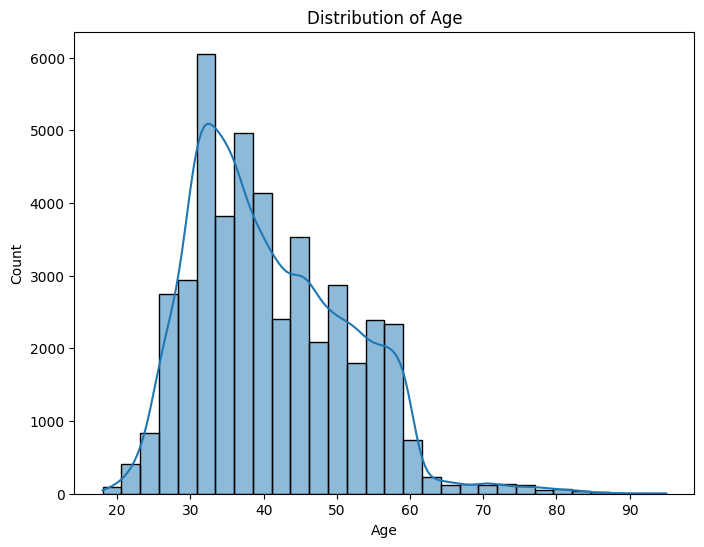

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

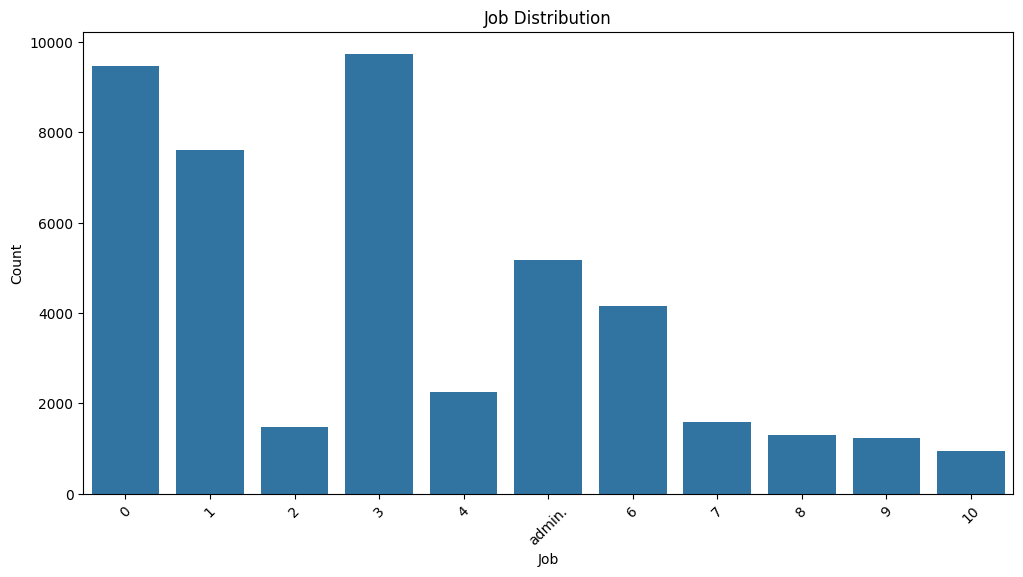

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df)
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Question-2
def minmax(df, column):
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df

In [33]:
def zscore(df, column):
    mean = np.mean(df[column])
    std = np.std(df[column])
    threshold = 3
    outlier = []
    z_scores = (df[column] - mean) / std
    outliers = df[abs(z_scores) > threshold]
    fig, axs = plt.subplots(2, figsize=(10, 8))
    fig.suptitle(f'Min-Max and Z-Score of {column}')
    axs[0].scatter(df.index, df[column])
    axs[0].set_title(f'Before min-max norm: {column}')
    df = minmax(df, column)
    axs[1].scatter(df.index, df[column])
    axs[1].scatter(outliers.index, outliers[column], color='r', label='Outliers')
    axs[1].set_title(f'After min-max norm: {column}')
    axs[1].legend()
    plt.show()

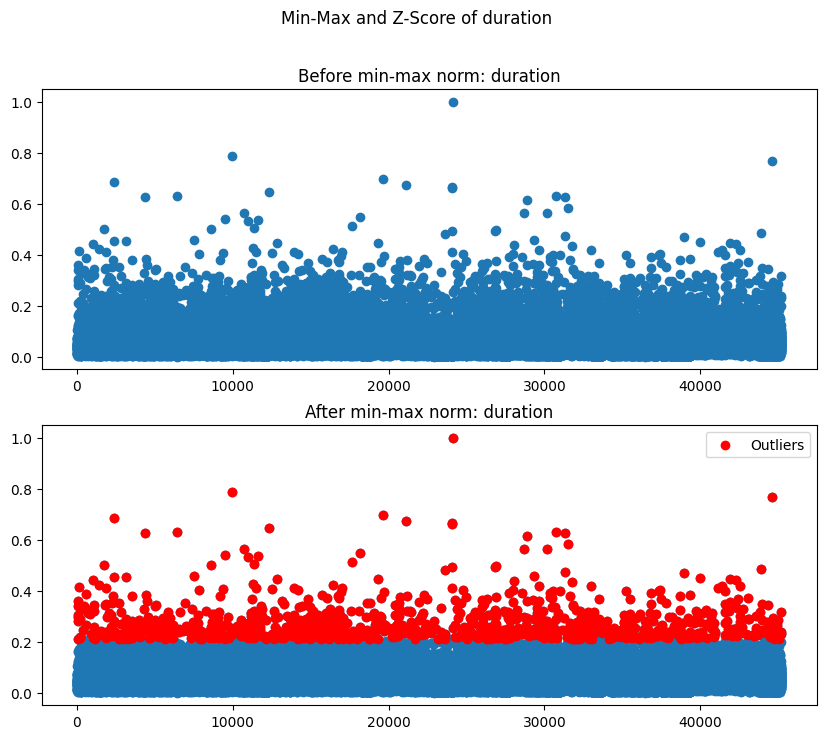

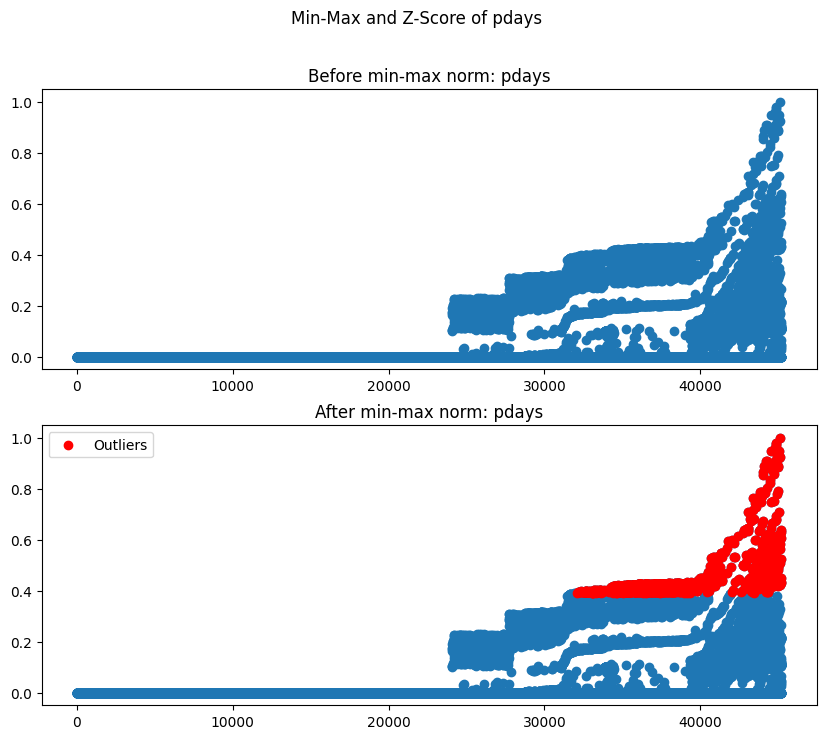

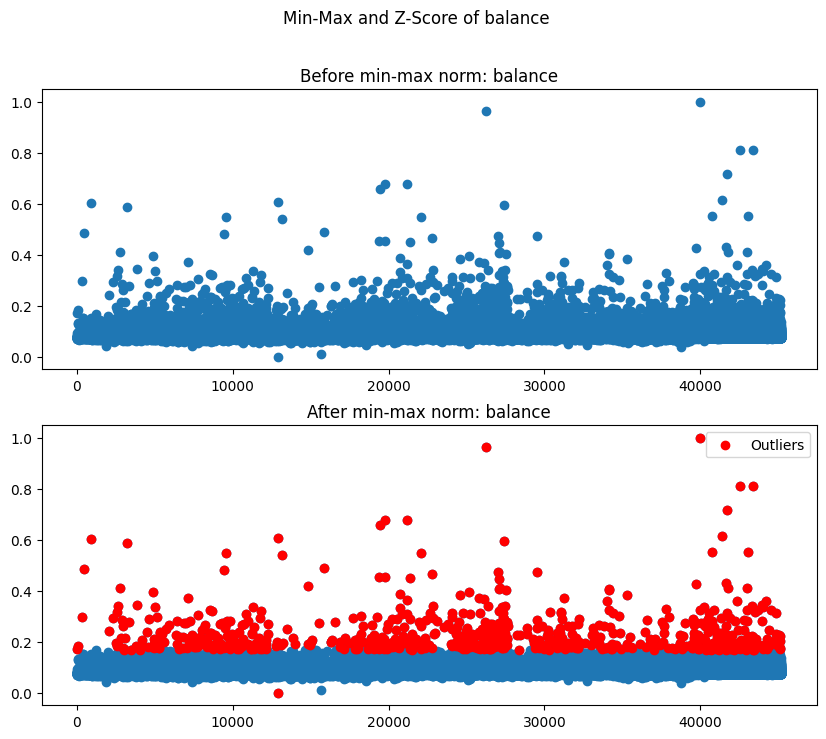

In [35]:
columns_to_normalize = ["duration", "pdays", "balance"]
for column in columns_to_normalize:
    zscore(df, column)